# Deteksi Dini Penyakit Stroke menggunakan Naive Bayes berdasarkan Dataset Kesehatan dengan normalisasi MinMax

## Data Understanding

### Inisialisasi data awal

In [1]:
import pandas as pd

# Baca file Excel
df = pd.read_csv("D:\KK\healthcare-dataset-stroke-data.csv", na_values=['N/A'])

# Lihat isi data
print(df.info())

print("Visualisasi Data:")
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None
Visualisasi Data:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes  

### Visualisasi setelah di drop beberapa kolom

In [2]:
import pandas as pd

# Baca file Excel
df = pd.read_csv("D:\KK\healthcare-dataset-stroke-data.csv")


# Drop kolom yang tidak diinginkan
df = df.drop(columns=['ever_married', 'work_type', 'Residence_type'])

# Lihat isi data
print(df.info())

print("Visualisasi Data:")
print(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   avg_glucose_level  5110 non-null   float64
 6   bmi                4909 non-null   float64
 7   smoking_status     5110 non-null   object 
 8   stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 359.4+ KB
None
Visualisasi Data:
         id  gender   age  hypertension  heart_disease  avg_glucose_level  \
0      9046    Male  67.0             0              1             228.69   
1     51676  Female  61.0             0              0             202.21   
2     31112    Male  80.0             0         

## Data Preprocessing

### Penanganan Missing Value

In [3]:
import numpy as np
import pandas as pd

# Misalnya df sudah dibuat, ubah 'N/A' menjadi NaN
df = df.replace('N/A', np.nan)

# Hitung jumlah missing value (NaN) per kolom
missing_values = df.isnull().sum()
print("Jumlah missing value (termasuk 'N/A') per kolom:")
print(missing_values)


Jumlah missing value (termasuk 'N/A') per kolom:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


### Standarisasi Data

Disini kita melakukan normalisasi data dengan menggunakan MinMaxScaler dari library sklearn sekaligus melakukan penanganan missing value

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Tangani missing value pada kolom 'bmi' dengan imputasi (mean, bisa juga median)
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi kolom 'bmi' (hasilnya dalam bentuk array, ubah jadi Series)
df['bmi'] = scaler.fit_transform(df[['bmi']])

# Tampilkan hasil
print(df)


         id  gender   age  hypertension  heart_disease  avg_glucose_level  \
0      9046    Male  67.0             0              1             228.69   
1     51676  Female  61.0             0              0             202.21   
2     31112    Male  80.0             0              1             105.92   
3     60182  Female  49.0             0              0             171.23   
4      1665  Female  79.0             1              0             174.12   
...     ...     ...   ...           ...            ...                ...   
5105  18234  Female  80.0             1              0              83.75   
5106  44873  Female  81.0             0              0             125.20   
5107  19723  Female  35.0             0              0              82.99   
5108  37544    Male  51.0             0              0             166.29   
5109  44679  Female  44.0             0              0              85.28   

           bmi   smoking_status  stroke  
0     0.301260  formerly smoked  

### Encoding Label

In [5]:
from sklearn.preprocessing import LabelEncoder

# Inisialisasi LabelEncoder
le = LabelEncoder()

# Label Encoding untuk kolom 'gender'
df['gender'] = le.fit_transform(df['gender'])

# Label Encoding untuk kolom 'smoking_status'
df['smoking_status'] = le.fit_transform(df['smoking_status'])

# Cek hasilnya
print(df)


         id  gender   age  hypertension  heart_disease  avg_glucose_level  \
0      9046       1  67.0             0              1             228.69   
1     51676       0  61.0             0              0             202.21   
2     31112       1  80.0             0              1             105.92   
3     60182       0  49.0             0              0             171.23   
4      1665       0  79.0             1              0             174.12   
...     ...     ...   ...           ...            ...                ...   
5105  18234       0  80.0             1              0              83.75   
5106  44873       0  81.0             0              0             125.20   
5107  19723       0  35.0             0              0              82.99   
5108  37544       1  51.0             0              0             166.29   
5109  44679       0  44.0             0              0              85.28   

           bmi  smoking_status  stroke  
0     0.301260               1    

#Pisahkan Fitur & Target

In [6]:
# Misalkan df adalah DataFrame kamu dan 'stroke' adalah target
X = df.drop(columns=['stroke'])  # Fitur
y = df['stroke']                 # Target



## Splitting Data

In [7]:
from sklearn.model_selection import train_test_split


# 2. Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
print(X_train.columns)

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'avg_glucose_level', 'bmi', 'smoking_status'],
      dtype='object')


## Modelling menggunakan Naive Bayes

Akurasi: 0.9315068493150684
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96       960
           1       0.38      0.21      0.27        62

    accuracy                           0.93      1022
   macro avg       0.67      0.59      0.62      1022
weighted avg       0.92      0.93      0.92      1022



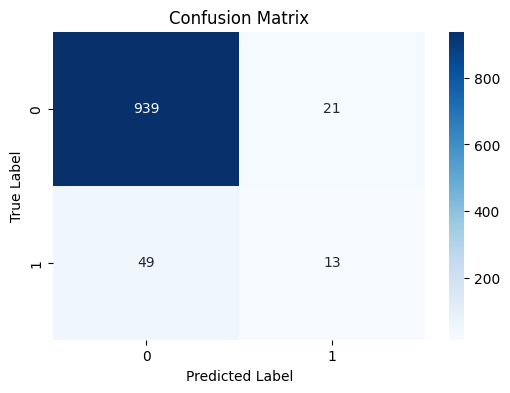

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Inisialisasi dan latih model Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Prediksi dan evaluasi
y_pred = model.predict(X_test)

# Evaluasi akurasi dan laporan klasifikasi
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test, y_pred))

# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Buat heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

### Simpan hasil modelling ke file pkl

In [10]:
import joblib

# Misalnya model sudah dilatih
# model = GaussianNB()
# model.fit(X_train, y_train)

# Simpan model ke file .pkl
joblib.dump(model, 'naive_bayes_stroke_model.pkl')

print("Model berhasil disimpan ke naive_bayes_stroke_model.pkl")


Model berhasil disimpan ke naive_bayes_stroke_model.pkl


## Evaluasi Data

Model Naive Bayes diatas menghasilkan akurasi sebesar 93,15%, yang berarti dari seluruh data uji, sebanyak 93,15% prediksi model sesuai dengan label sebenarnya (stroke atau tidak stroke)